In [59]:
import os
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
path = "/Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie"
os.chdir(path)
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import numpy as np
from sklearn import ensemble
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import bamboolib

Current working directory: /Users/chereowang27/NYCDSA/Capstone/NYCDSA_Capstone/Cherie


In [60]:
df = pd.read_csv('./data/metro_CA_2011_2018_lagged.csv', index_col = None)
# drop missing data after lagging and keep only dataset lagged by 1 year
df = df.iloc[:, :-4].dropna()

df["year"]= pd.to_datetime(df["year"], format = "%Y").dt.year
df.sort_values("year", ignore_index = True, inplace = True)
df.head()

,year,aggregate_travel_time_to_work,amerindian_including_hispanic,amerindian_pop,armed_forces,asian_including_hispanic,asian_male_45_54,asian_male_55_64,asian_pop,associates_degree,avg_rent,bachelors_degree,bachelors_degree_2,bachelors_degree_or_higher_25_64,black_including_hispanic,black_male_45_54,black_male_55_64,black_pop,children,children_in_single_female_hh,civilian_labor_force,commute_10_14_mins,commute_15_19_mins,commute_20_24_mins,commute_25_29_mins,commute_30_34_mins,commute_35_39_mins,commute_35_44_mins,commute_40_44_mins,commute_45_59_mins,commute_5_9_mins,commute_60_89_mins,commute_60_more_mins,commute_90_more_mins,commute_less_10_mins,commuters_16_over,commuters_by_bus,commuters_by_car_truck_van,commuters_by_carpool,commuters_by_public_transportation,commuters_by_subway_or_elevated,commuters_drove_alone,different_house_year_ago_different_city,different_house_year_ago_same_city,dwellings_10_to_19_units,dwellings_1_units_attached,dwellings_1_units_detached,dwellings_20_to_49_units,dwellings_2_units,dwellings_3_to_4_units,dwellings_50_or_more_units,dwellings_5_to_9_units,employed_agriculture_forestry_fishing_hunting_mining,employed_arts_entertainment_recreation_accommodation_food,employed_construction,employed_education_health_social,employed_finance_insurance_real_estate,employed_information,employed_manufacturing,employed_other_services_not_public_admin,employed_pop,employed_public_administration,employed_retail_trade,employed_science_management_admin_waste,employed_transportation_warehousing_utilities,employed_wholesale_trade,families_with_young_children,family_households,father_in_labor_force_one_parent_families_with_young_children,father_one_parent_families_with_young_children,female_10_to_14,female_15_to_17,female_18_to_19,female_20,female_21,female_22_to_24,female_25_to_29,female_30_to_34,female_35_to_39,female_40_to_44,female_45_to_49,female_50_to_54,female_55_to_59,female_5_to_9,female_60_to_61,female_62_to_64,female_65_to_66,female_67_to_69,female_70_to_74,female_75_to_79,female_80_to_84,female_85_and_over,female_female_households,female_pop,female_under_5,four_more_cars,gini_index,graduate_professional_degree,group_quarters,high_school_diploma,high_school_including_ged,hispanic_any_race,hispanic_male_45_54,hispanic_male_55_64,hispanic_pop,households,households_public_asst_or_food_stamps,households_retirement_income,housing_built_1939_or_earlier,housing_built_2000_to_2004,housing_built_2005_or_later,housing_units,housing_units_renter_occupied,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,income_100000_124999,income_10000_14999,income_125000_149999,income_150000_199999,income_15000_19999,income_200000_or_more,income_20000_24999,income_25000_29999,income_30000_34999,income_35000_39999,income_40000_44999,income_45000_49999,income_50000_59999,income_60000_74999,income_75000_99999,income_less_10000,income_per_capita,less_one_year_college,less_than_high_school_graduate,male_10_to_14,male_15_to_17,male_18_to_19,male_20,male_21,male_22_to_24,male_25_to_29,male_30_to_34,male_35_to_39,male_40_to_44,male_45_64_associates_degree,male_45_64_bachelors_degree,male_45_64_grade_9_12,male_45_64_graduate_degree,male_45_64_high_school,male_45_64_less_than_9_grade,male_45_64_some_college,male_45_to_49,male_45_to_64,male_50_to_54,male_55_to_59,male_5_to_9,male_60_61,male_62_64,male_65_to_66,male_67_to_69,male_70_to_74,male_75_to_79,male_80_to_84,male_85_and_over,male_male_households,male_pop,male_under_5,management_business_sci_arts_employed,married_households,masters_degree,median_age,median_income,median_rent,median_year_structure_built,million_dollar_housing_units,mobile_homes,mortgaged_housing_units,no_car,no_cars,nonfamily_households,not_hispanic_pop,not_in_labor_force,not_us_citizen_pop,occupation_management_arts,occupation_natural_resources_construction_maintenance,occupation_production_transportation_material,occupation_sales_office,occupation_services,occupied_housing_units,one_car,

In [98]:
commute = df[['no_car',
 'no_cars',
     'commute_10_14_mins',
 'commute_15_19_mins',
 'commute_20_24_mins',
 'commute_25_29_mins',
 'commute_30_34_mins',
 'commute_35_39_mins',
 'commute_35_44_mins',
 'commute_40_44_mins',
 'commute_45_59_mins',
 'commute_5_9_mins',
 'commute_60_89_mins',
 'commute_60_more_mins',
 'commute_90_more_mins',
 'commute_less_10_mins',
 'commuters_16_over',
 'commuters_by_bus',
 'commuters_by_car_truck_van',
 'commuters_by_carpool',
 'commuters_by_public_transportation',
 'commuters_by_subway_or_elevated',
 'commuters_drove_alone',
    'four_more_cars',
            'one_car',
           'three_cars',
 'two_cars',
 'walked_to_work',
           'aggregate_travel_time_to_work',
]]
commute["commute_10_45_min"] = commute[['commute_15_19_mins',
                                           'commute_20_24_mins',
                                            'commute_25_29_mins',
                                            'commute_30_34_mins',
                                             'commute_35_39_mins',
                                             'commute_35_44_mins']].sum(axis = 1)
commute["commute_45_90_min"] = commute[['commute_45_59_mins',
                                         'commute_5_9_mins',
                                         'commute_60_89_mins',]].sum(axis = 1)
commute = commute.drop(['commute_10_14_mins','commute_15_19_mins','commute_20_24_mins',
 'commute_25_29_mins',
 'commute_30_34_mins',
 'commute_35_39_mins',
 'commute_35_44_mins',
 'commute_40_44_mins',
  'commute_45_59_mins',
 'commute_5_9_mins',
                        'commute_60_more_mins',
 'commute_60_89_mins','aggregate_travel_time_to_work'],axis = 1)


In [99]:
list(commute.columns)

['no_car',
 'no_cars',
 'commute_90_more_mins',
 'commute_less_10_mins',
 'commuters_16_over',
 'commuters_by_bus',
 'commuters_by_car_truck_van',
 'commuters_by_carpool',
 'commuters_by_public_transportation',
 'commuters_by_subway_or_elevated',
 'commuters_drove_alone',
 'four_more_cars',
 'one_car',
 'three_cars',
 'two_cars',
 'walked_to_work',
 'commute_10_45_min',
 'commute_45_90_min']

In [103]:
target = ["rent_in_1y"]
y = df[target]
X = commute
X.shape

(6091, 18)

In [104]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
n_splits = 10
tscv = TimeSeriesSplit(gap = 0, max_train_size = None, n_splits = n_splits, test_size = None)
for train_index,test_index in tscv.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]


In [6]:
# for train_index,test_index in tscv.split(X):
#     print("%s %s" % (train_index, test_index))

In [105]:
X_train.shape

(5538, 18)

In [106]:
lasso = Lasso(max_iter=10000, normalize=True)
alphas = np.linspace(.00000001,.0001,10)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

In [107]:
R2_lasso = R2_lasso.reset_index()
R2_lasso

,index,train,test
0,1.000000e-08,0.3527,0.313887
1,1.112000e-05,0.3527,0.313883
2,2.223000e-05,0.3527,0.313879
3,3.334000e-05,0.3527,0.313875
4,4.445000e-05,0.3527,0.313871
5,5.556000e-05,0.3527,0.313867
6,6.667000e-05,0.3527,0.313863
7,7.778000e-05,0.3527,0.313859
8,8.889000e-05,0.3527,0.313855
9,1.000000e-04,0.3527,0.313851


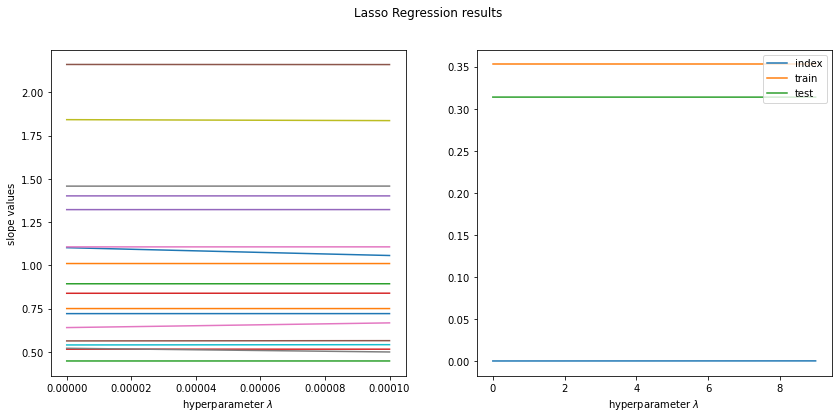

In [108]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, 10**coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)
# Takes forever. And still doesn't converge even with max_iter=10000

In [16]:
# feature selection on income related variables
X = df[['year',
          'median_income',
          'percent_income_spent_on_rent',
          'pop_determined_poverty_status',
          'poverty',
          'rent_10_to_15_percent',
 'rent_15_to_20_percent',
 'rent_20_to_25_percent',
 'rent_25_to_30_percent',
 'rent_30_to_35_percent',
 'rent_35_to_40_percent',
 'rent_40_to_50_percent',
 'rent_burden_not_computed',
 'rent_over_50_percent',
 'rent_under_10_percent',
'renter_occupied_housing_units_paying_cash_median_gross_rent',
          'income_100000_124999',
 'income_10000_14999',
 'income_125000_149999',
 'income_150000_199999',
 'income_15000_19999',
 'income_200000_or_more',
 'income_20000_24999',
 'income_25000_29999',
 'income_30000_34999',
 'income_35000_39999',
 'income_40000_44999',
 'income_45000_49999',
 'income_50000_59999',
 'income_60000_74999',
 'income_75000_99999',
 'income_less_10000',
 'income_per_capita',
]]

In [17]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
n_splits = 10
tscv = TimeSeriesSplit(gap = 0, max_train_size = None, n_splits = n_splits, test_size = None)
for train_index,test_index in tscv.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]



In [31]:
lasso = Lasso(max_iter=10000, normalize=True)
alphas = np.linspace(0.1,10,100)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

In [44]:
# R2_lasso = R2_lasso.reset_index()
# R2_lasso

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lasso = Lasso(normalize = True)
lasso_pipe = Pipeline([
    ('standardize', StandardScaler()), 
    ('lasso', lasso)
])
params = {'lasso__alpha': np.linspace(0.8,1.0, 100)}

kfold = KFold(n_splits = 3, shuffle = True)
gs_ls = GridSearchCV(lasso_pipe, param_grid = params, scoring = 'r2', cv = tscv)
gs_ls.fit(X_train, y_train)

print("Estimator which gave the highest score: ", gs_ls.best_estimator_)
print("Mean cross-validated score of the best_estimator: ", gs_ls.best_score_)
print("The best parameters are: ", gs_ls.best_params_)

Estimator which gave the highest score:  Pipeline(steps=[('standardize', StandardScaler()),
                ('lasso', Lasso(alpha=0.8, normalize=True))])
Mean cross-validated score of the best_estimator:  0.6626203278399159
The best parameters are:  {'lasso__alpha': 0.8}


In [34]:
lasso.set_params(alpha = 0.6626203278399159, tol = .01, max_iter = 10000)
lasso.fit(X_train, y_train)

lasso_coefs = dict(zip(X.columns, lasso.coef_))

lasso_coefs_keep = {k:v for (k,v) in 
                    sorted(lasso_coefs.items(), key = lambda item: item[1], reverse = True)
                    if v !=0}
print(len(lasso_coefs_keep))
lasso_coefs_keep

7


{'year': 29.52993267254112,
 'rent_under_10_percent': 0.7314770291737801,
 'renter_occupied_housing_units_paying_cash_median_gross_rent': 0.45907345012698203,
 'rent_10_to_15_percent': 0.04889222795737204,
 'rent_over_50_percent': 0.03934618971771472,
 'income_per_capita': 0.022597252686336618,
 'income_75000_99999': -0.010364874167002044}

In [115]:
#feature selection on household related variables
X = df[[ 'married_households',
      'pop_divorced',
      'children',
      'children_in_single_female_hh',
      'families_with_young_children',
      'family_households',
      'father_in_labor_force_one_parent_families_with_young_children',
      'father_one_parent_families_with_young_children',
      'female_female_households',
       'male_male_households',
      'nonfamily_households',
  'one_parent_families_with_young_children',
 'pop_never_married',
 'pop_now_married',
 'pop_separated',
 'pop_widowed',
  'two_parent_families_with_young_children',
 'two_parents_father_in_labor_force_families_with_young_children',
 'two_parents_in_labor_force_families_with_young_children',
 'two_parents_mother_in_labor_force_families_with_young_children',
 'two_parents_not_in_labor_force_families_with_young_children',
      'households',
 'households_public_asst_or_food_stamps',
 'households_retirement_income',
 'housing_built_1939_or_earlier',
 'housing_built_2000_to_2004',
 'housing_built_2005_or_later',
 'housing_units',
 'housing_units_renter_occupied',
     ]]

In [116]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
n_splits = 10
tscv = TimeSeriesSplit(gap = 0, max_train_size = None, n_splits = n_splits, test_size = None)
for train_index,test_index in tscv.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

In [117]:
lasso = Lasso(max_iter=10000, normalize=True)
alphas = [0.00000001, 0.0000001, 0.00001]
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

In [118]:
R2_lasso = R2_lasso.reset_index()
R2_lasso

,index,train,test
0,1.000000e-08,0.374523,0.307773
1,1.000000e-07,0.374523,0.307773
2,1.000000e-05,0.374523,0.307772


In [114]:
R2_lasso = R2_lasso.reset_index()
R2_lasso

,level_0,index,train,test
0,0,1.000000e-08,0.374523,0.307773
1,1,1.000000e-07,0.374523,0.307773
2,2,1.000000e-05,0.374523,0.307772


In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lasso = Lasso(normalize = True)
lasso_pipe = Pipeline([
    ('standardize', StandardScaler()), 
    ('lasso', lasso)
])
params = {'lasso__alpha': np.linspace(0.02,.04, 100)}


gs_ls = GridSearchCV(lasso_pipe, param_grid = params, scoring = 'r2', cv = tscv)
gs_ls.fit(X_train, y_train)

print("Estimator which gave the highest score: ", gs_ls.best_estimator_)
print("Mean cross-validated score of the best_estimator: ", gs_ls.best_score_)
print("The best parameters are: ", gs_ls.best_params_)

Estimator which gave the highest score:  Pipeline(steps=[('standardize', StandardScaler()),
                ('lasso', Lasso(alpha=0.028282828282828285, normalize=True))])
Mean cross-validated score of the best_estimator:  0.7137398116646274
The best parameters are:  {'lasso__alpha': 0.028282828282828285}


In [109]:
lasso.set_params(alpha = 0.028282828282828285, tol = .01, max_iter = 10000)
lasso.fit(X_train, y_train)

lasso_coefs = dict(zip(X.columns, lasso.coef_))

lasso_coefs_keep = {k:v for (k,v) in 
                    sorted(lasso_coefs.items(), key = lambda item: item[1], reverse = True)
                    if v !=0}
print(len(lasso_coefs_keep))
lasso_coefs_keep

15


{'walked_to_work': 0.4938519717615291,
 'commuters_by_public_transportation': 0.20786590017295947,
 'commute_45_90_min': 0.134388047660165,
 'two_cars': 0.13307848535864192,
 'commute_10_45_min': 0.017685620121422593,
 'commuters_by_car_truck_van': -0.008003703332689875,
 'commuters_by_subway_or_elevated': -0.00850095606109643,
 'three_cars': -0.019120795443951365,
 'one_car': -0.02871244076341775,
 'commuters_by_bus': -0.03465291848912329,
 'no_car': -0.09173479090407785,
 'no_cars': -0.15905041530089215,
 'commute_less_10_mins': -0.2860842264620496,
 'commuters_by_carpool': -0.3319817672211535,
 'commute_90_more_mins': -0.377682653645123}

In [61]:
# run lasso on dwelling building type
X = df[[
     'dwellings_10_to_19_units',
     'dwellings_1_units_attached',
     'dwellings_1_units_detached',
     'dwellings_20_to_49_units',
     'dwellings_2_units',
     'dwellings_3_to_4_units',
     'dwellings_50_or_more_units',
     'dwellings_5_to_9_units',
     'median_year_structure_built',
     'million_dollar_housing_units',
     'mobile_homes',
    'mortgaged_housing_units',
    'occupied_housing_units',
    'owner_occupied_housing_units_lower_value_quartile',
    'owner_occupied_housing_units_median_value',
    'owner_occupied_housing_units_upper_value_quartile',
    'owner_occupied_housing_units'
]]

In [62]:
X.shape

(6091, 17)

In [63]:
y.shape

(6091, 1)

In [65]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
n_splits = 10
tscv = TimeSeriesSplit(gap = 0, max_train_size = None, n_splits = n_splits, test_size = None)
for train_index,test_index in tscv.split(X):
    X_train, X_test = X.values[train_index], X.values[test_index]
    y_train, y_test = y.values[train_index], y.values[test_index]

In [88]:
lasso = Lasso(max_iter=10000, normalize=True)
alphas = np.linspace(1.6,2,10)
coefs_lasso = []
R2_train = []
R2_test = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)
    R2_train.append(lasso.score(X_train, y_train))
    R2_test.append(lasso.score(X_test, y_test))
    
    
coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X.columns)
R2_lasso = pd.DataFrame({'train': R2_train,'test':R2_test}, index = alphas)

In [89]:
R2_lasso = R2_lasso.reset_index()
R2_lasso

,index,train,test
0,1.600000,0.719963,0.815002
1,1.644444,0.718680,0.815286
2,1.688889,0.717361,0.815496
3,1.733333,0.716007,0.815633
4,1.777778,0.714618,0.815697
5,1.822222,0.713194,0.815687
6,1.866667,0.711734,0.815605
7,1.911111,0.710240,0.815449
8,1.955556,0.708710,0.815220
9,2.000000,0.707145,0.814918


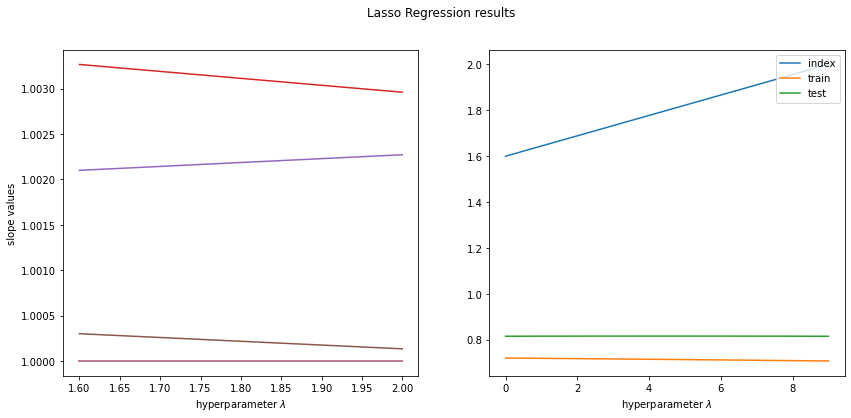

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('Lasso Regression results')

for feat in coefs_lasso.columns:
    ax1.plot(coefs_lasso.index, 10**coefs_lasso[feat]) 
ax1.set_xlabel(r'hyperparameter $\lambda$')
ax1.set_ylabel(r'slope values')
#ax1.legend(loc=1)
for each in R2_lasso.columns:
    ax2.plot(R2_lasso.index, R2_lasso[each], label=each)
ax2.set_xlabel(r'hyperparameter $\lambda$')
ax2.legend(loc=1)

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lasso = Lasso(normalize = True)
lasso_pipe = Pipeline([
    ('standardize', StandardScaler()), 
    ('lasso', lasso)
])
params = {'lasso__alpha': np.linspace(.001,0.5, 100)}

gs_ls = GridSearchCV(lasso_pipe, param_grid = params, scoring = 'r2', cv = tscv)
gs_ls.fit(X_train, y_train)

print("Estimator which gave the highest score: ", gs_ls.best_estimator_)
print("Mean cross-validated score of the best_estimator: ", gs_ls.best_score_)
print("The best parameters are: ", gs_ls.best_params_)s

Estimator which gave the highest score:  Pipeline(steps=[('standardize', StandardScaler()),
                ('lasso', Lasso(alpha=0.373989898989899, normalize=True))])
Mean cross-validated score of the best_estimator:  0.7400520548350142
The best parameters are:  {'lasso__alpha': 0.373989898989899}


In [96]:
lasso.set_params(alpha = 0.373989898989899, tol = .01, max_iter = 10000)
lasso.fit(X_train, y_train)

lasso_coefs = dict(zip(X.columns, lasso.coef_))

lasso_coefs_keep = {k:v for (k,v) in 
                    sorted(lasso_coefs.items(), key = lambda item: item[1], reverse = True)
                    if v !=0}
print(len(lasso_coefs_keep))
lasso_coefs_keep

7


{'dwellings_2_units': 0.09152268493869407,
 'dwellings_1_units_attached': 0.034220129762571584,
 'dwellings_50_or_more_units': 0.02532447477104174,
 'owner_occupied_housing_units_lower_value_quartile': 0.002257698699635147,
 'owner_occupied_housing_units_median_value': 0.0004169309733227149,
 'owner_occupied_housing_units_upper_value_quartile': 0.00023942364909961358,
 'dwellings_1_units_detached': -0.01103283413434098}